In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
#Loading the data
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [48]:
#Data Analysis
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.groupby(['Sex','Survived']).size()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [7]:
data.shape


(891, 12)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

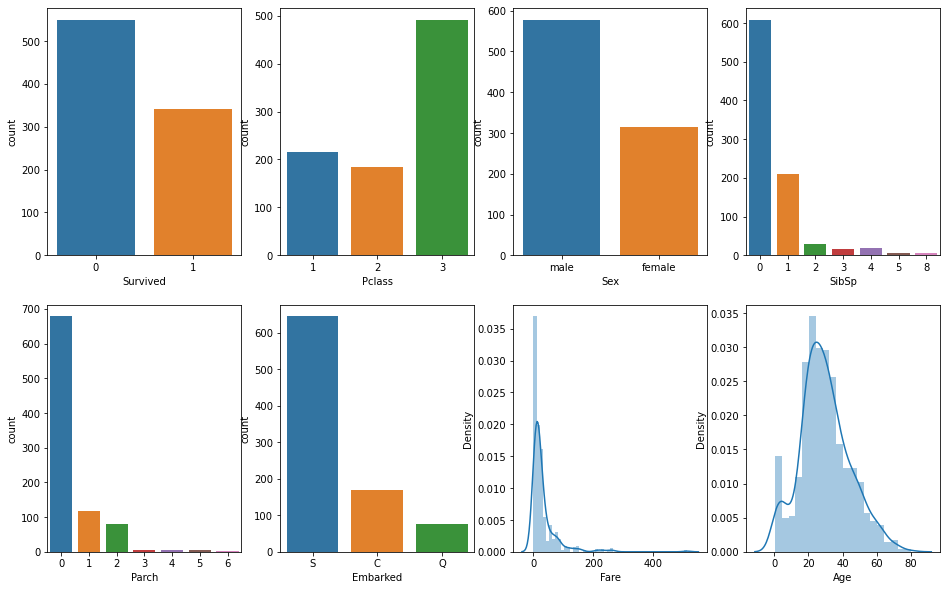

In [10]:
#Univariate Analysis
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=data,ax=axes[0,0])
sns.countplot('Pclass',data=data,ax=axes[0,1])
sns.countplot('Sex',data=data,ax=axes[0,2])
sns.countplot('SibSp',data=data,ax=axes[0,3])
sns.countplot('Parch',data=data,ax=axes[1,0])
sns.countplot('Embarked',data=data,ax=axes[1,1])
sns.distplot(data['Fare'], kde=True,ax=axes[1,2])
sns.distplot(data['Age'].dropna(),kde=True,ax=axes[1,3])

# Bivariate Analysis

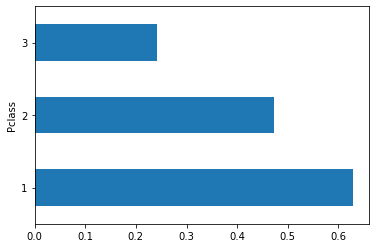

In [66]:
a=data.groupby('Pclass')['Survived'].mean().plot(kind="barh")


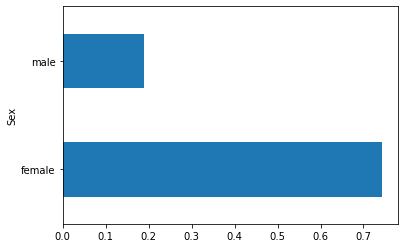

In [44]:
b=data.groupby('Sex')['Survived'].mean().plot(kind="barh")

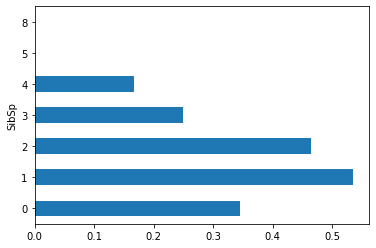

In [53]:
c=data.groupby('SibSp')['Survived'].mean().plot(kind="barh")

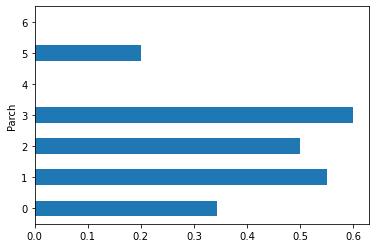

In [54]:
d=data.groupby('Parch')['Survived'].mean().plot(kind="barh")

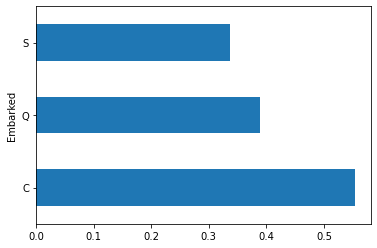

In [55]:
e=data.groupby('Embarked')['Survived'].mean().plot(kind="barh")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

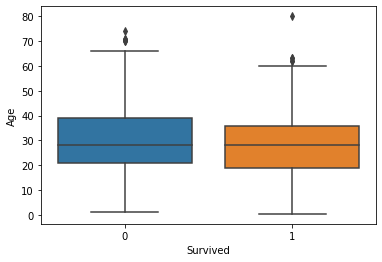

In [78]:
sns.boxplot(x="Survived",y="Age",data=data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

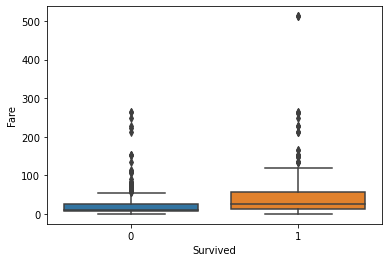

In [79]:
sns.boxplot(x="Survived",y="Fare",data=data)

In [67]:
data.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

(array([[160.,  73.,  40.,  30.,  11.,  12.,   2.,   0.,   6.,   1.,   4.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.],
        [562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 2 BarContainer objects>)

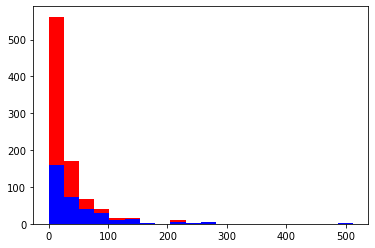

In [77]:
fig=plt.figure()
plt.hist([data[data["Survived"]==1]["Fare"],data[data["Survived"]==0]["Fare"]],stacked=True,color=['b','r'],bins=20,label=["Survived","Dead"])


Text(0, 0.5, 'Fare')

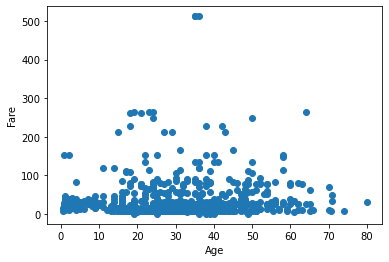

In [84]:
plt.scatter(x="Age",y="Fare",data=data)
plt.xlabel("Age")
plt.ylabel("Fare")

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data["Age"],size=14,label="Age")
plt.hist(data["Fare"],size=14,label="Fare")

1.Passenger ID is the unique id given to the traveller on the ship
2.Pclass- the class in which the passenger is travelling- takes values-1,2,3
3.Name- Name of the passenger travelling in the ship
4.Sex- Gender of the passenger
5.Age- Age of the passenger
6.SibSp-Number of Siblings and Spouses travelling with the passenger
7.Parch- Number of Parents and Children travelling with the passenger
8.Ticket- Ticket number of the passenger
9.Fare- Ticket fare
10.Cabin-Cabin number
11.Embarked- Describes the 3 possible areas of the titanic from which people embark , takes 3 possible values- S,C,Q
12.We can see that out of 891 observations in the test dataset only 714 records have the Age populated .i.e around 177 values      are missing. We need to impute this with mean value.
13.We can see men who are between 20 to 40 are survived more compared to older aged men as depicted by the green histogram.        Women on the other hand survived more than men, comparatively well on all the age groups.
14.When we plot the ticket fare of passengers who are survived/dead, we can see that the passengers with cheaper ticket fares      are more likely to die. That is passengers with expensive tickets (could be more important social status) are seem to be        rescued on priority
15.Passengers with high number of siblings survived less compared to passengers with more number of siblings.
16.When the number of parents and children travelling with the passenger were less, the survival rate is higher probably due to    the reason of multiple seat booking from one family.
17.We can also infer that passengers who embarked from C survived more, following Q and S

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
#Filling Null Values for Age and Embarked, Cabin has high number of missing values, hence has to be dropped.
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Embarked"].fillna(data["Embarked"].mode,inplace=True)

In [50]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [56]:
#Dropping Passenger ID, Name and Cabin Columns, since ID and Name is unique and Cabin has high missing values
d_dr=data.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

In [58]:
d_dr["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [59]:
from sklearn.utils import resample
df_major=d_dr[d_dr["Survived"]==0]
df_minor=d_dr[d_dr["Survived"]==1]
df_minorupsample=resample(df_minor,replace=True,n_samples=549,random_state=42)
dfupsampled= pd.concat([df_minorupsample, df_major])

In [60]:
dfupsampled

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
288,1,2,male,42.000000,0,0,13.0000,S
697,1,3,female,29.699118,0,0,7.7333,Q
298,1,1,male,29.699118,0,0,30.5000,S
208,1,3,female,16.000000,0,0,7.7500,Q
483,1,3,female,63.000000,0,0,9.5875,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,7.0500,S
885,0,3,female,39.000000,0,5,29.1250,Q
886,0,2,male,27.000000,0,0,13.0000,S
888,0,3,female,29.699118,1,2,23.4500,S


In [61]:
data_encode=pd.get_dummies(data=dfupsampled[["Sex","Embarked"]],drop_first=True)

databar=dfupsampled.drop(columns=["Sex","Embarked"],axis = 1)
databar=data_encode.join(databar)

In [62]:
databar

,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,0,1,0,3,22.0,1,0,7.2500
1,0,1,0,0,1,1,38.0,1,0,71.2833
2,0,0,0,1,1,3,26.0,0,0,7.9250
2,0,0,0,1,1,3,26.0,0,0,7.9250
2,0,0,0,1,1,3,26.0,0,0,7.9250
...,...,...,...,...,...,...,...,...,...,...
889,1,1,0,0,1,1,26.0,0,0,30.0000
889,1,1,0,0,1,1,26.0,0,0,30.0000
889,1,1,0,0,1,1,26.0,0,0,30.0000
889,1,1,0,0,1,1,26.0,0,0,30.0000


In [68]:
#Splitting features and target
X=databar[["Sex_male","Embarked_C","Embarked_Q","Embarked_S","Pclass","Age","SibSp","Parch","Fare"]]
Y=databar[["Survived"]]

In [69]:
#Scaling the features using Standard Scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scale=scale.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.33)

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(x_train,y_train)
lr.score(x_train,y_train)


0.7675250357653791

In [99]:
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred)
acc1

0.7420289855072464

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model1,x_train,y_train, scoring='accuracy', cv=cv)
score1=cv1.mean()
score1

0.7689465570400823

In [ ]:
#Difference between Accuracy Score and Cross Validation Score=2

# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RF=RandomForestClassifier()
model2=RF.fit(x_train,y_train)

In [106]:
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
acc2

0.9289855072463769

In [107]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv2=cross_val_score(model2,x_train,y_train, scoring='accuracy', cv=cv)
score2=cv2.mean()
score2

0.9313001027749228

In [ ]:
#Difference between Accuracy Score and Cross Validation Score=1

# KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
model3= KNeighborsClassifier(n_neighbors=3)
model3.fit(x_train,y_train)
y_pred= model3.predict(x_test)

from sklearn.metrics import accuracy_score
acc3=accuracy_score(y_test,y_pred)
acc3

0.9101449275362319

In [109]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv3=cross_val_score(model3,x_train,y_train, scoring='accuracy', cv=cv)
score3=cv3.mean()
score3

0.909830421377184

In [ ]:
#Difference between Accuracy Score and Cross Validation Score=1

# SVC

In [110]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(x_train,y_train)
pred_y= model4.predict(x_test)

acc4=accuracy_score(y_test,pred_y)
acc4

0.8043478260869565

In [112]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv4=cross_val_score(model4,x_train,y_train, scoring='accuracy', cv=cv)
score4=cv4.mean()
score4

0.8232939362795477

In [ ]:
#Difference between Accuracy Score and Cross Validation Score=2

# Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acc5=accuracy_score(y_test,y_pred)
acc5

0.9246376811594202

In [117]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv5=cross_val_score(model5,x_train,y_train, scoring='accuracy', cv=cv)
score5=cv5.mean()
score5

0.9298818088386435

In [ ]:
#Difference between Accuracy Score and Cross Validation Score=0

# Gaussian NB

In [113]:
from sklearn.naive_bayes import GaussianNB
model6= GaussianNB()
model6.fit(x_train,y_train)
y_pred= model6.predict(x_test)

acc6=accuracy_score(y_test,y_pred)
acc6

0.7434782608695653

In [115]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv6=cross_val_score(model6,x_train,y_train, scoring='accuracy', cv=cv)
score6=cv6.mean()
score6

0.7767934224049331

In [143]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
clf=DecisionTreeClassifier()

In [166]:
param_dist = {"max_depth": [3, None],"criterion": ["gini", "entropy"],'ccp_alpha': [0.0,0.2,0,3],"min_samples_leaf":[2,3,4]}

In [167]:
samples = 8  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples,cv=3)

In [168]:
final=randomCV.fit(x_train,y_train)
print(final.best_params_)

{'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'entropy', 'ccp_alpha': 0}


In [169]:
import pickle
pickle.dump(final, open('titanic.pkl', 'wb'))

In [170]:
pickled_model = pickle.load(open('titanic.pkl', 'rb'))
pickled_model.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,